# Project description

You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?
You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.


# Table of contents

1. [Introduction](#introduction)
2. [Analysing The Data](#analysingdata)
    1. [Conclusion](#conclusion)
3. [Data Preprocessing](#datapreprocessing) 
    1. [Conclusion](#conclusion1)
4. [Data Analysis](#dataanalysis1)
   1. [Investigating The Proportions Of The Various Types Of Establishments](#proportions)
   2. [Investigating The Proportions Of Chain And Nonchain Establishments](#proportions1)
   3. [Which type of establishment is typically a chain?](#chain)
   4. [Plottig A Graph Of The Top Ten Streets By Number Of Restaurants](#toptenstreets)
   5. [Distribution Of The Number Of Seats For The Streets With Many Restaurants](#restaurantstreets)
   6. [Determining The Average Number Of Seats For Each Type Of Restaurant](#seatsaverage)
5. [Conclusion](#conclusion)   

## Introduction <a name="introduction"></a>

In this project, I will examine different establishments and see the correlation between various parameters such as the number of seats, location, and the business type. I will provide the visual evidence of the analyzed data along with the commentary.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install usaddress
import usaddress 

In [ ]:
from plotly import graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers;

## Analysing The Data <a name="analysingdata"></a>

In [6]:
rest_data= pd.read_csv('/Users/annaperkas/Downloads/rest_data_us.csv')
rest_data.head(5)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [7]:
rest_data.tail();

In [8]:
rest_data.sample();

In [9]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [10]:
rest_data.shape

(9651, 6)

In [11]:
rest_data.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [12]:
rest_data.nsmallest(5, 'number');

In [13]:
rest_data.nlargest(5,'number');

In [14]:
rest_data['object_name'].value_counts()

THE COFFEE BEAN & TEA LEAF     47
SUBWAY                         31
DOMINO'S PIZZA                 15
WABA GRILL                     14
KENTUCKY FRIED CHICKEN         14
                               ..
TOSCANOVA                       1
VENICE GRIND                    1
RINCON OAXAQUENO #2             1
ET'S DONUTS                     1
HOTEL BEL AIR EMPLOYEE CAFE     1
Name: object_name, Length: 8672, dtype: int64

In [15]:
rest_data['object_name'].value_counts().count()

8672

In [16]:
rest_data['object_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

In [17]:
rest_data['object_type'].value_counts().count()

6

In [18]:
print(rest_data.duplicated().sum())

0


In [19]:
rest_data.isna().mean().round(4) * 100

id             0.00
object_name    0.00
address        0.00
chain          0.03
object_type    0.00
number         0.00
dtype: float64

In [20]:
rest_data.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [21]:
null_counts = rest_data.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

chain    3
dtype: int64

In [22]:
rest_data['chain'].unique()

array([False, True, nan], dtype=object)

In [23]:
rest_data['chain'].value_counts()

False    5972
True     3676
Name: chain, dtype: int64

In [24]:
chain_unknown_data = (rest_data[(rest_data['chain'] != 'False') & (rest_data['chain'].isnull())])
chain_unknown_data

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


### Conclusion <a name="conclusion"></a>

The dataset has six columns and 9651 rows. The smallest number of seats is 1, and the biggest is 229. There are three NaNs in the chain column that will need to be examined and replaced according to the findings. Given that there are only three places with missing values, it will be possible to replace them manually. Not every value in the address column is arranged according to the standard for the US addresses, so this will need to be fixed. Restaurants have the most significant share of the establishments in the data, and bakeries have the smallest.

## Data Preprocessing <a name="datapreprocessing"></a>

In [25]:
rest_data.loc[rest_data.object_name == 'TAQUERIA LOS 3 CARNALES', 'chain'] = False

https://taqueria-los-3-carnales.business.site/

In [26]:
rest_data.loc[rest_data.object_name == "JAMMIN JIMMY'S PIZZA",'chain'] = False

https://www.facebook.com/Jammin-Jimmys-Pizza-175385095849306/about/?ref=page_internal

In [27]:
rest_data.loc[rest_data.object_name == 'THE LEXINGTON THEATER','chain'] = False

https://lexbarla.com/

Based on my findings (links are provided), all of the establishments that had the type missing turned out to be restaurants and bars that were exclusively in one location and were not chains.

In [28]:
#cleaning the street addresses and business name

In [29]:
street_example=rest_data.iloc[0]['address']
street_example

'3708 N EAGLE ROCK BLVD'

In [30]:
usaddress.parse(street_example)

[('3708', 'AddressNumber'),
 ('N', 'StreetNamePreDirectional'),
 ('EAGLE', 'StreetName'),
 ('ROCK', 'StreetName'),
 ('BLVD', 'StreetNamePostType')]

In [31]:
raw_address=usaddress.parse(street_example)
raw_address

[('3708', 'AddressNumber'),
 ('N', 'StreetNamePreDirectional'),
 ('EAGLE', 'StreetName'),
 ('ROCK', 'StreetName'),
 ('BLVD', 'StreetNamePostType')]

In [32]:
dict_address={}
for i in raw_address:
    dict_address.update({i[1]:i[0]})

In [33]:
dict_address

{'AddressNumber': '3708',
 'StreetNamePreDirectional': 'N',
 'StreetName': 'ROCK',
 'StreetNamePostType': 'BLVD'}

In [34]:
dict_address['StreetName']+','+dict_address['AddressNumber']

'ROCK,3708'

In [35]:
def cleaning_check(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    #this line below checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
        return clean_adress
    else:
        return 'no street or number'

In [36]:
rest_data['clean_street_check']=rest_data.address.apply(cleaning_check)

In [37]:
rest_data[rest_data['clean_street_check']=='no street or number'];

In [38]:
usaddress.parse(rest_data.iloc[1888]['address'])

[('OLVERA', 'PlaceName'), ('ST', 'StateName'), ('E17', 'ZipCode')]

In [39]:
#example of my final code
def cleaning_final(raw):
    if raw.startswith('OLVERA'):
        clean_adress='OLVERA,Los Angeles,USA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='1033 1/2 LOS ANGELES ST,Los Angeles,USA'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=dict_address['AddressNumber']+" "+str(dict_address['StreetName'])+str(', Los Angeles,USA')
    return clean_adress

In [40]:
rest_data['clean_street_final']=rest_data.address.apply(cleaning_final)
rest_data.sample(1)

,id,object_name,address,chain,object_type,number,clean_street_check,clean_street_final
7428,19214,LOS COMPADRES,633 N SPRING ST STE # 8,True,Restaurant,8,"633,SPRING","633 SPRING, Los Angeles,USA"


In [41]:
rest_data['street_name'] = (rest_data['address'].replace('(^[0-9]+)','',regex=True)\
                            .replace('[0-9 #]+$','',regex=True).replace('^[1/2 #]+','',regex=True)\
                            .replace('# [0-9]+','',regex=True).replace('^[# 3/4]+','',regex=True))

In [42]:
rest_data['street_name'].head(); #test

In [43]:
rest_data['business_name'] = (rest_data['object_name'].replace('(^[0-9]+)','',regex=True).replace('[0-9 #]+$','',regex=True))

In [44]:
rest_data['business_name'].head()

0    HABITAT COFFEE SHOP
1               REILLY'S
2         STREET CHURROS
3      TRINITI ECHO PARK
4                 POLLEN
Name: business_name, dtype: object

In [45]:
#checking if chains don't have the numbers for each location
rest_data['business_name'] == "MCDONALD'S"
rest_data_fastfood = (rest_data.loc[rest_data['object_name'] == "MCDONALD'S"]['object_name'].count())
rest_data_fastfood

13

### Conclusion <a name="conclusion1"></a>

After cleaning street names and the addresses, the format no longer has building numbers and, in the case of business, the number of each branch for chain establishments.

## Step 2. Data analysis <a name="dataanalysis1"></a>


### Investigating The Proportions Of The Various Types Of Establishments <a name="proportions"></a>

In [46]:
establishments_proportion = rest_data.groupby('object_type').size()
establishments_proportion = establishments_proportion.reset_index().rename_axis(None,axis=1)
establishments_proportion.rename(columns={0:'count'},inplace=True)
establishments_proportion

,object_type,count
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,320
5,Restaurant,7255


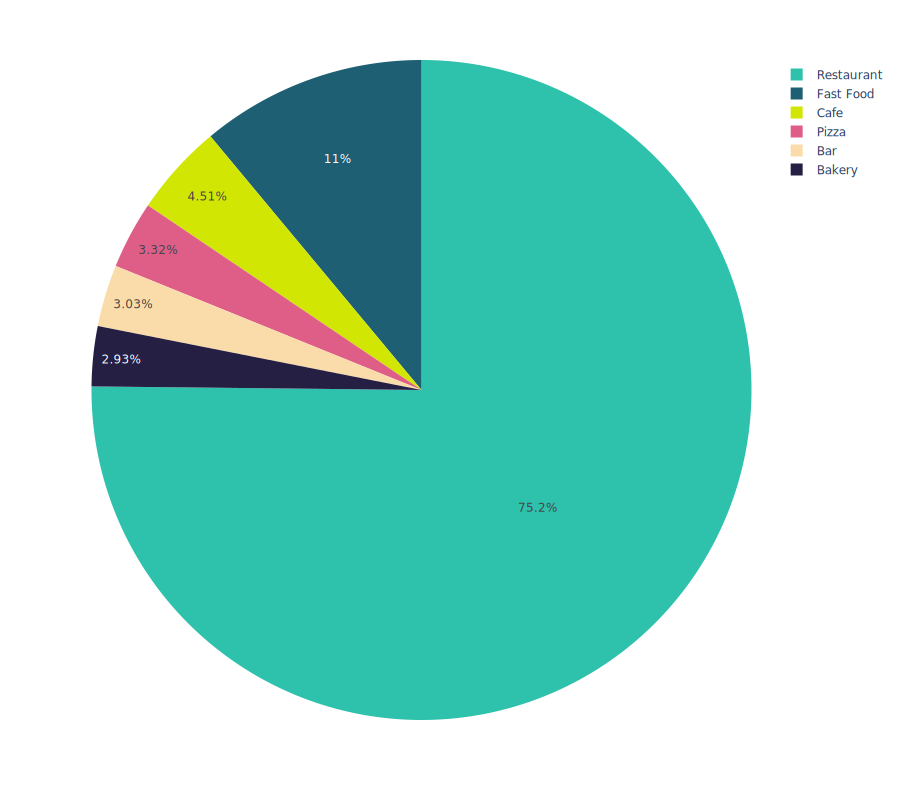

In [47]:
fig2 = px.pie(establishments_proportion, values='count', names='object_type', color='object_type',
              color_discrete_map={'Restaurant':'2ec1ac',
                                 'Fast Food':'1e5f74',
                                 'Bakery':'251f44',
                                 'Cafe':'d2e603',
                                 'Pizza':'df5e88',
                                 'Bar':'FADCAA'})

fig2.show(renderer="svg",height=800,width=900)

Most of the establishments are restuarants (75.2 percent) followed by fast food (11 percent), and the smaller proprtion consists of cafes, pizzerias, bars and bakeries.

In [48]:
rest_data.groupby(["object_type", "business_name"]).sum().reset_index()


,object_type,business_name,id,number
0,Bakery,C BAKERY CAFE,13618,45
1,Bakery,CELSIUS BAKERY CAFE,20825,37
2,Bakery,ACHA'S BAKERY,18342,12
3,Bakery,ADDY'S BAKERY,19845,11
4,Bakery,ALCOVE CAFE & BAKERY,19812,41
...,...,...,...,...
7865,Restaurant,ZULY'S 99 AND UP DISCOUNT,20955,10
7866,Restaurant,ZUMA KITCHEN,17808,98
7867,Restaurant,ZWEET CAFE,17302,15
7868,Restaurant,ZWONNY KITCHEN INC,16871,35


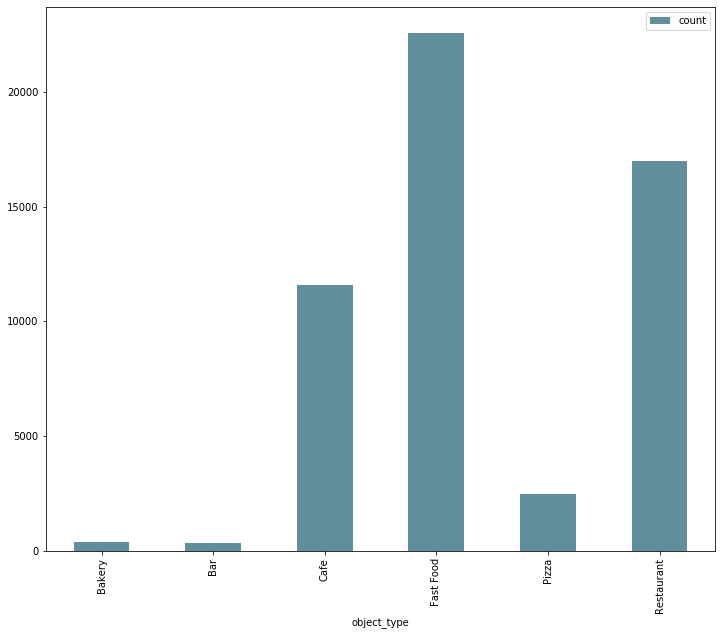

Proportions Of Establishments Relative To Their Type


In [49]:
rest_data['count'] = rest_data.groupby(["object_type", "business_name"])["id"].transform("count")
type_count = rest_data.groupby('object_type')['count'].agg('sum')
type_count.plot(kind = 'bar', x = 'object_type', y = 'count',alpha = 0.7,color='#1e5f74', legend = True, figsize = (12,10))
plt.show()
print('Proportions Of Establishments Relative To Their Type')

This graph shows that fast food has the biggest proportion of fast food establishments relative to the rest. It is interesting that in the last graph, restaurants are the biggest group. However, we examined the overall number, but here, we examined the ratio by name. In the end, the result here indicates that many restaurants are chains, and when we group them by name, they have a smaller proportion in terms of variety.

### Investigating The Proportions Of Chain And Nonchain Establishments  <a name="proportions1"></a>

In [50]:
chain_proportion = rest_data.groupby('chain').size()
chain_proportion = chain_proportion.reset_index().rename_axis(None,axis=1)
chain_proportion.rename(columns={0:'count'},inplace=True)
chain_proportion.rename({False: 'Not A Chain', True: 'Chain'}, axis='index')
chain_proportion

,chain,count
0,False,5975
1,True,3676


Proportions of Chain And Nonchain Estblishments


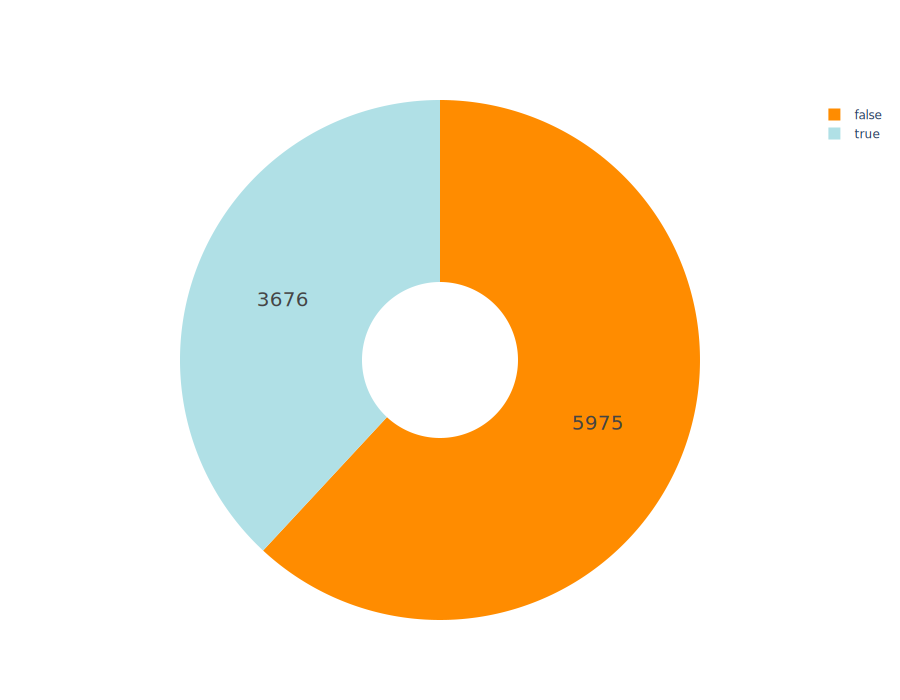

In [51]:
colors = ['DarkOrange','PowderBlue']

fig = go.Figure(data=[go.Pie(labels= chain_proportion['chain'],
                             values= chain_proportion['count'],
                             hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors))

print('Proportions of Chain And Nonchain Estblishments')

fig.show(renderer="svg",height=700,width=900)

The values are taken from the preliminary analysis.Turns out that more than half of the establishments from the list are not chains.

### Which type of establishment is typically a chain? <a name="chain"></a>

In [52]:
chain_typical = rest_data[rest_data['chain'] == True]
#chain_typical #test

In [53]:
chain_typical = chain_typical.groupby('object_type').size()
chain_typical = chain_typical.reset_index().rename_axis(None,axis=1)
chain_typical.rename(columns={0:'count'},inplace=True)
chain_typical.sort_values(by='count',ascending=True)

,object_type,count
1,Bar,77
4,Pizza,153
2,Cafe,266
0,Bakery,283
3,Fast Food,605
5,Restaurant,2292


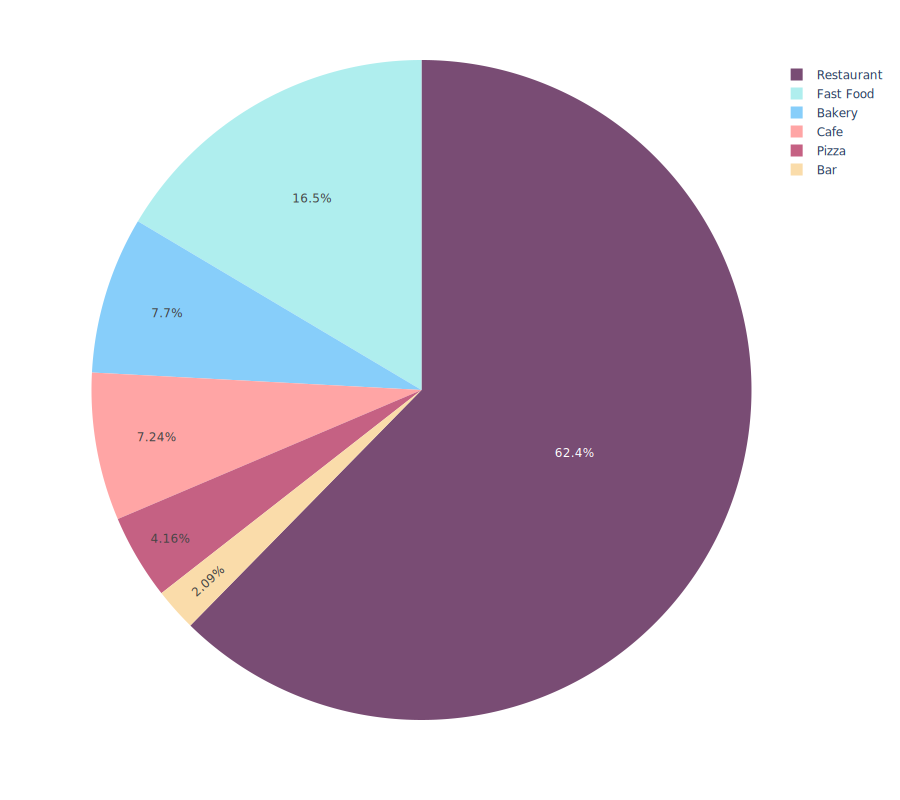

In [54]:
fig2 = px.pie(chain_typical, values='count', names='object_type', color='object_type',
              color_discrete_map={'Restaurant':'794C74',
                                 'Fast Food':'paleturquoise',
                                 'Bakery':'lightskyblue',
                                 'Cafe':'ffa5a5',
                                 'Pizza':'C56183',
                                 'Bar':'FADCAA'})

fig2.show(renderer="svg",height=800,width=900)


This graph supports my argument that most of the restaurants are chains followed by fast-food establishments, bakeries, cafes, pizzerias, and bars.

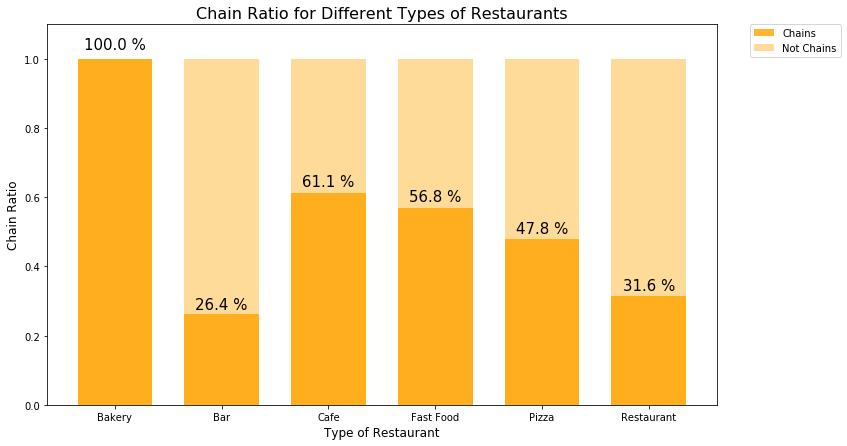

In [55]:
df=rest_data.groupby(['object_type','chain'])[['id']].count().reset_index()
df['chain_ratio'] = (df.id / df.groupby('object_type')['id'].transform('sum'))
chains = df.query('chain==True').chain_ratio
 
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Chain Ratio for Different Types of Restaurants',fontsize=16)
plt.xlabel('Type of Restaurant',fontsize=12)
plt.ylabel('Chain Ratio',fontsize=12)

colors = ['DarkOrange','PowderBlue', 'SteelBlue', 'orange', 'lightgreen','Linen','MediumPurple']
 
#plot
g = plt.bar(df.query('chain==True').object_type, df.query('chain==True').chain_ratio,
        0.7, label='Chains',color=colors[3], alpha=0.8)
g1 = plt.bar(df.query('chain==True').object_type, 1, 0.7,
     label='Not Chains', color=colors[3], alpha=0.4)
 
 
#get text above the bar
bar_label = (chains*100).round(1).tolist()
bar_label = [str(label) for label in bar_label]
def autolabel(rects):
    for idx,rect in enumerate(g):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                bar_label[idx]+" %",
                ha='center', va='bottom', rotation=0, size=15)
autolabel(g)  
plt.ylim(0,1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

So this graph shows rather surprising results; all bakeries in the data are chains. The rest of the categories showed the results according to the expectations. 

### Plottig A Graph Of The Top Ten Streets By Number Of Restaurants  <a name="toptenstreets"></a>

In [56]:
busy_streets = rest_data.street_name.value_counts().reset_index(name='number_of_restaurants')
top_busy_streets = busy_streets.query('number_of_restaurants >150')
top_busy_streets.rename({"index": "street_name"},axis=1,inplace=True) 

Top Ten Most Popular Streets


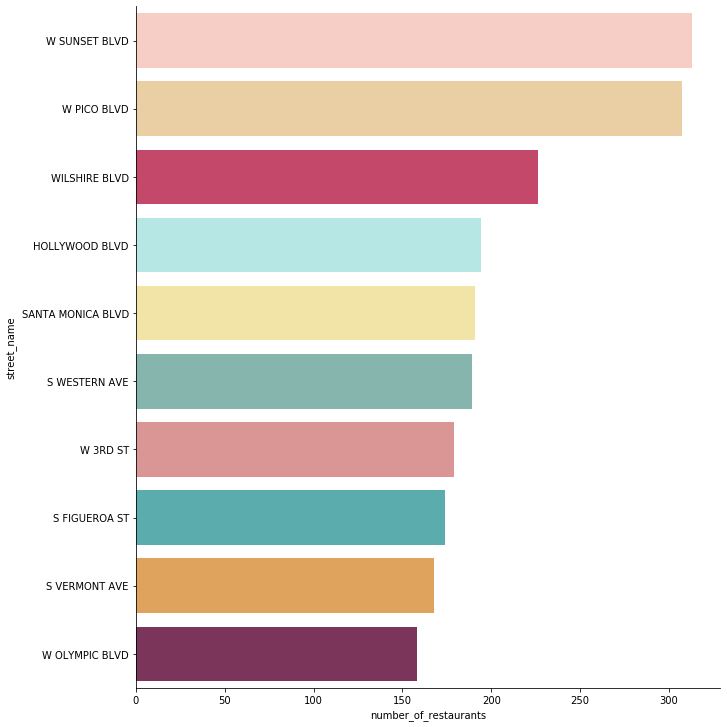

In [57]:
colors = {'#4cbbb9','#862a5c','#f4a548','#f6d198','#7ebdb4','#d8345f','#e58a8a','#aeefec','#ffeb99','#ffc8bd'}

sns.catplot(x="number_of_restaurants", y="street_name",kind="bar",data=top_busy_streets ,height=10,palette=colors)
print('Top Ten Most Popular Streets')


The most popular street is Sunset Boulevard which is not surprising given the fact that it is famous worldwide.

https://en.wikipedia.org/wiki/Sunset_Boulevard

In [58]:
#findning how many streets have only 1 restaurant
one_restaurant = busy_streets.query('number_of_restaurants == 1')
one_restaurant['number_of_restaurants'].sum()

1150

In [59]:
#finding the proportion of the streets with only one restaurant
1150 / 9651

0.11915863641073464

There are 1150 streets with only one restaurant which is only approximately 0.12 percent of the entire number presented in the data.

### Distribution Of The Number Of Seats For The Streets With Many Restaurants  <a name="restaurantstreets"></a>

In [60]:
top_50 = busy_streets.nlargest(20,'number_of_restaurants')
top_50.columns=['street_name','number_of_restaurants']
top_50_series=top_50['street_name']
top_50_series.head()

0        W SUNSET BLVD
1          W PICO BLVD
2        WILSHIRE BLVD
3       HOLLYWOOD BLVD
4    SANTA MONICA BLVD
Name: street_name, dtype: object

In [61]:
top_50_seats = rest_data[rest_data['street_name'].isin(top_50_series)]
#top_50_seats #test

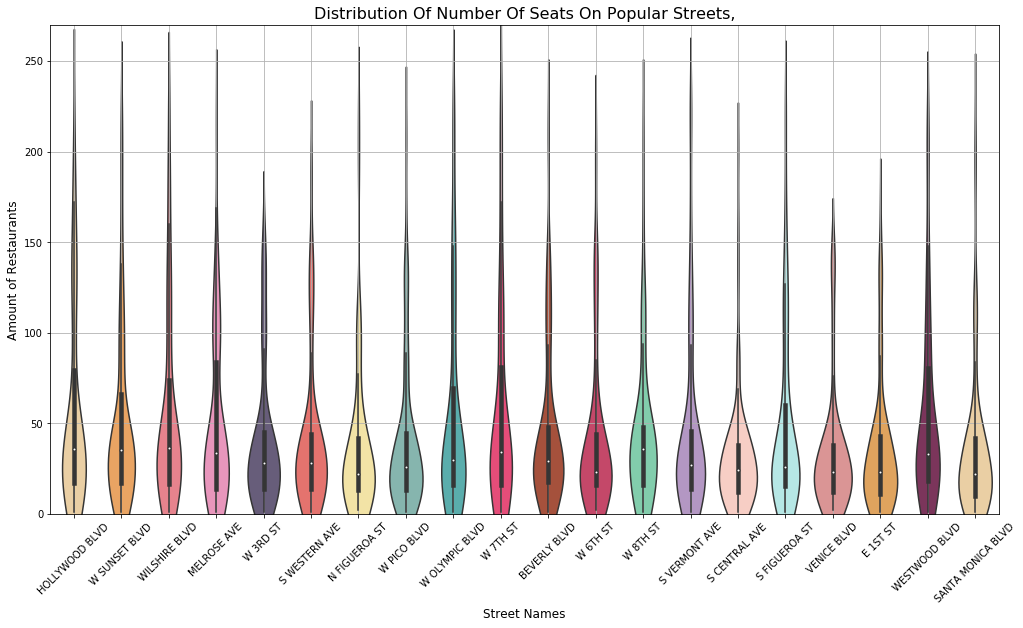

In [62]:
fig, ax = plt.subplots(figsize=(17,9))
plt.xticks(rotation=45)
plt.ylim(0,270)

colors = {'#862a5c','#f4a548','#f6d198','#7ebdb4',\
          '#d8345f','#e58a8a','#4cbbb9','#aeefec',\
          '#ffeb99','#ffc8bd','#ffa34d','#f8615a','#b590ca',\
         '#75daad','#f688bb','#fe346e','#f67280','#b7472a','#65587f','#f67280'}

ax.set_title('Distribution Of Number Of Seats On Popular Streets,',fontsize=16)
g=sns.violinplot(x='street_name',y='number',kind='violin',height=16,data=top_50_seats,ax=ax,palette=colors)

plt.close(2)
ax.set_xlabel('Street Names',fontsize=12)
ax.set_ylabel('Amount of Restaurants',fontsize=12)
plt.grid()

In [63]:
top_50_seats['number'].mean()

45.38825396825397

The trend is clear: most of the establishments on popular streets have less than a hundred seats, with the mean number being approximately 45.4. 

### Determining The Average Number Of Seats For Each Type Of Restaurant <a name="seatsaverage"></a>

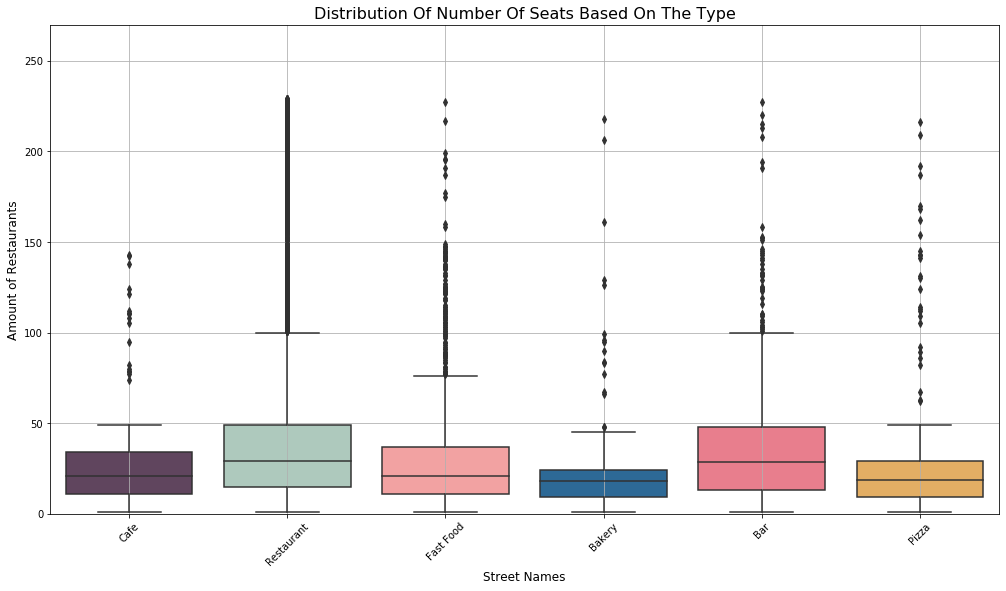

In [64]:


fig, ax = plt.subplots(figsize=(17,9))
plt.xticks(rotation=45)
plt.ylim(0,270)
ax.set_title('Distribution Of Number Of Seats Based On The Type',fontsize=16)

colors = {'Cafe':'#654062','Restaurant':'#aacdbe','Fast Food':'#ff9595',\
          'Bakery':'#1b6ca8','Bar':'#f96d80','Pizza':'#f8b24f'}

g=sns.boxplot(x='object_type',y='number',data=rest_data,ax=ax,
              palette=colors)

plt.close(2)
ax.set_xlabel('Street Names',fontsize=12)
ax.set_ylabel('Amount of Restaurants',fontsize=12)
plt.grid()

According to the distribution of seats based on the type, the biggest establishments in terms of the size and the number of people they can accommodate are restaurants. Bakery, on average, has the fewest number of seats. Cafes have some outliers, which are still crucial for the data to highlight bigger venues, but overall, the number of seats does not exceed fifty.

Text(0, 0.5, 'Count')

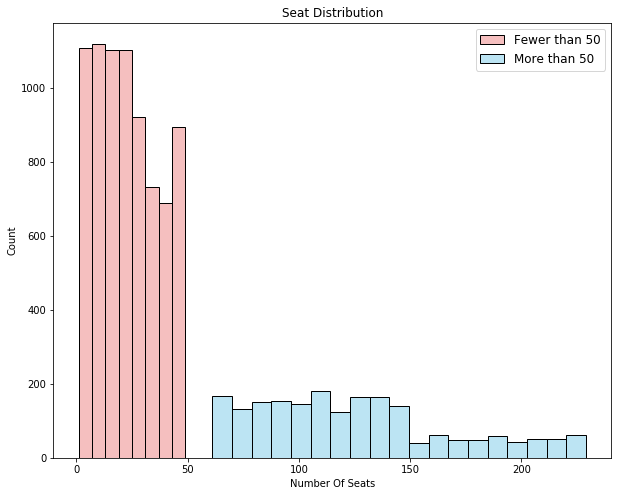

In [65]:
plt.figure(figsize=(10,8))
few_seats = rest_data[rest_data.number <= 50]
sns.histplot(few_seats['number'],  kde=False, label='Fewer than 50',bins=8,color='#f2aaaa')

many_seats =rest_data[rest_data.number >= 50]
sns.histplot(many_seats['number'],  kde=False,label='More than 50',color='#a6dcef')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Seat Distribution')
plt.xlabel('Number Of Seats')
plt.ylabel('Count')

Here we see that most that the overwhelming majority has fewer than 50 seats while other establishments that account for more than two thirds places with less seats.

## Conclusion  <a name="conclusion"></a>

Restaurants and fast-food account for the most significant proportion of establishments. The busiest streets have places that mostly have fewer than 50 seats. Around 61 percent of cafes in LA are chains, which means that they have a better-established presence. They are very few cafes with a large sitting area, which means that it is not necessarily the case that in order to break into the market and maintain relevancy, it would be essential to have a bigger room. 

Sunset Boulevard has the biggest presence of cafes and restaurants, so it would be a tough market to break into. While hype could be a good thing, the idea should also be exceptional and would require further consideration in terms of the design, marketing campaigns, and the cost of renting in such an area. Perhaps it would be better to look into less competitive areas, albeit where business can still grow through word of mouth.